**СБОРНЫЙ ПРОЕКТ - 1**

# Планирование рекламной кампании

Цель работы: изучить данные, чтобы выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

План работы:

- Открываем файл с данными и изучаем общую информацию
- Подготавливаем данные
- Проводим исследовательский анализ данных
- Составляем портрет пользователя каждого региона
- Проверяем гипотезы:
1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2) средние пользовательские рейтинги жанров Action и Sports разные.
- Пишем общий вывод по проделланой работе/

Описание данных:

1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. ORating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию


### Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')
#выводим и просмариваем первые строки датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
#просматриваем информацию о файле, какой у каждого столбца тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Замечаем, что year_of_release типа float64 - нужно заменить на int64, так как год выпуска не может быть вещественным. Также нужно заменить на float64 user_score.

In [3]:
#вычислим и отобразим сводную статистику датафрейма
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
#gосмотрим какие столбцы у нас есть и все ли с ними впорядке
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#посчитаем количество пустых значений
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

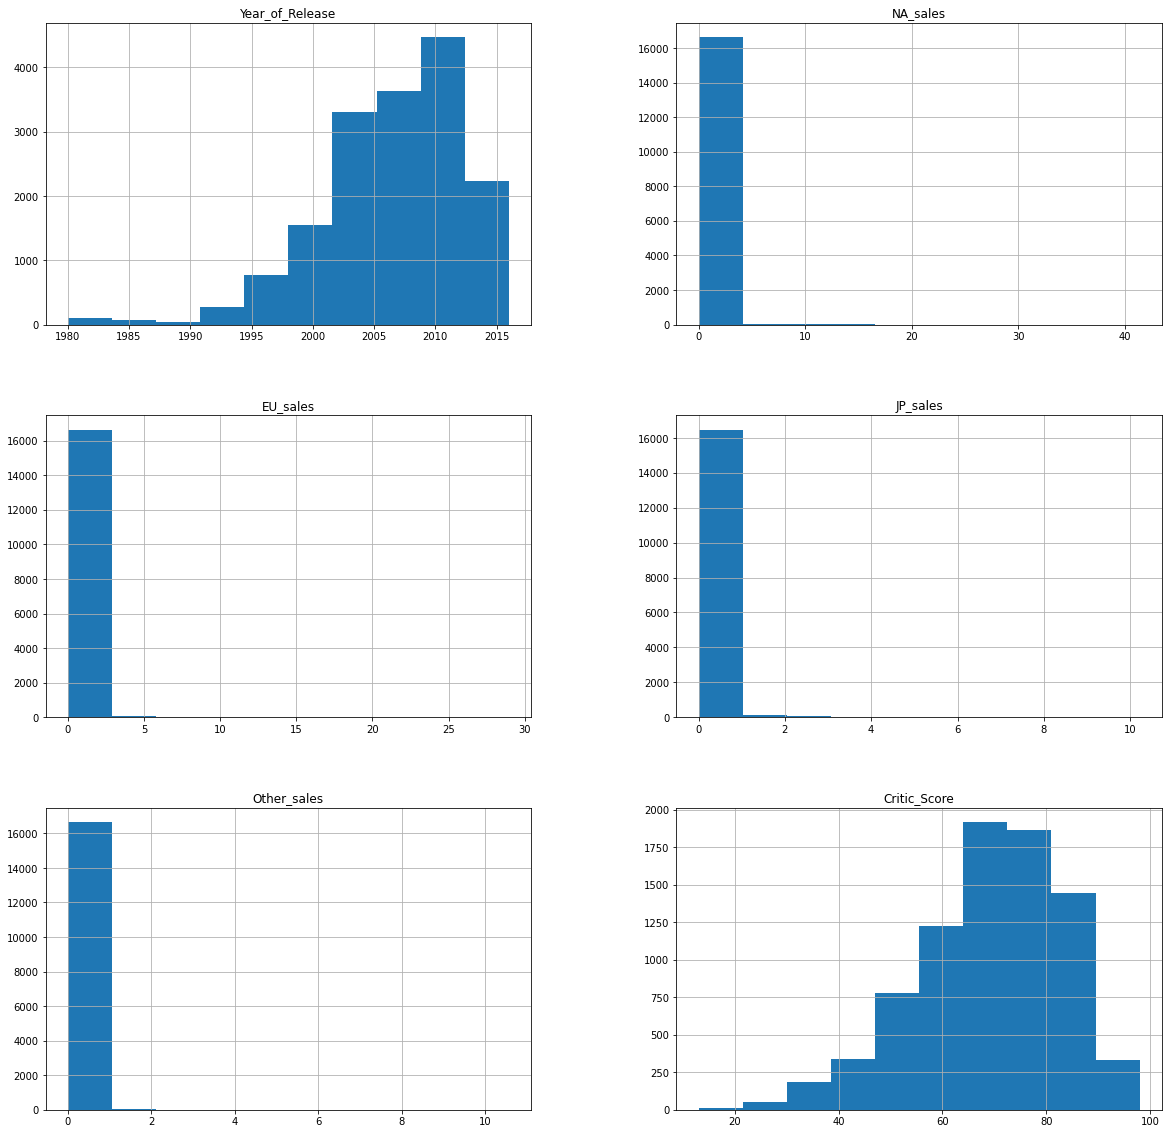

In [6]:
#построим гистограммы размером 20*20 по каждому столбцу датафрейма
data.hist(figsize = (20, 20))
plt.show()

**Вывод:** 
1) Year_of_Release - имеет формат float64, а должен быть int64, также User_Score - имеет тип object, а должен быть float64. 

2) Также в датафрейме имеется много пропусков: Name - 2;  Year_of_Release - 269; Critic_Score - 8578; User_Score - 6701; Rating - 6766

3) Заголовки столбцов можно привести к нижнему регистру, для удобства. 

4) Никаких отрицательных значений в датафрейме не оказалось. 

5) Аномалий не выявлено.

### Подготавливаем данные

In [7]:
#проверяем наличие явных дубликатов 
data.duplicated().sum()

0

In [8]:
#заменяем названия столбцов (приведим к нижнему регистру)
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
#просматриваем уникальные значения столбцов, где хотим заменить тип
print(data['year_of_release'].unique())
data['user_score'].unique()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Замечаем аббревиатуру 'tbd' в столбце с оценкой пользователей, "to be determined" означает, что значение только предстоит определить, следовательно, это неизвестное значение и можно заменить его на NaN

In [10]:
#заменим значение "tbd" на NaN и перепроверим вновь
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
#преобразовываем данные в нужные типы
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].astype('float64')
#перепроверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [12]:
#проверим наличие явных дубликатов в data
data.duplicated().sum()

0

In [13]:
#почтитаем сумму пропущенных значений по кажому столбцу датафрейма еще раз
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [14]:
#просмотрим строки датафрейма, где встречались пропуски столбца name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Замечаем, что в этих строках также имеются пропуски в столбцах genre, critic_score, user_score, rating. 5 пропусков из 11 много, поэтому удаляем эти строки. Их всего 2 и сильного влияния на результат они не окажут - лучше будем работать с более качественными данными.
После удаления пропуски и в name и в genre пропадут.

In [15]:
#удаляем и перепроверяем
data = data.dropna(subset = ['name']).reset_index(drop = True)
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [16]:
#просмотрим строки датафрейма, где встречались пропуски столбца year_of_release
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как их тоже не сильно много, а восстановить их корректно нельзя, то тоже принимаем решения удалить пропуски в столбце year_of_release

In [17]:
#удаляем и перепроверяем
data = data.dropna(subset = ['year_of_release']).reset_index(drop = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [18]:
#посмотрим уникальные значения столбца rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заметим, что среди уникальных значений есть RP - «Рейтинг ожидается», именно на него можно заменить значения nan

In [19]:
#заменяем и перепроверяем
data['rating'] = data['rating'].fillna('RP')
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [20]:
#посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


**Вывод:** поменяли тип данных там, где это было необходимо, избавились от пропусков в name и genre. Остальные столбцы оставили пока без изменений ввиду того, что возможно в какой-то период критики не оценивали игры, также как и пользователи, либо они новые и их еще просто не успели оценить. В любом случае отбрасывать их пока не будем, они пригодятся для дальнейшего анализа.

### Проведение исследовательского анализа данных

<AxesSubplot:>

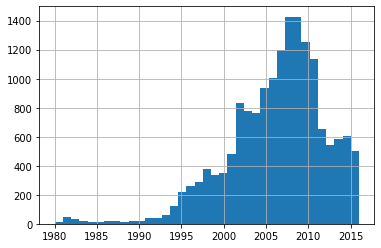

In [44]:
data['year_of_release'].hist(bins = 37)

По графику видно, что игры начали выпускаться с 1980 года и примерно с 1998 года начался сильный прирост.

<AxesSubplot:>

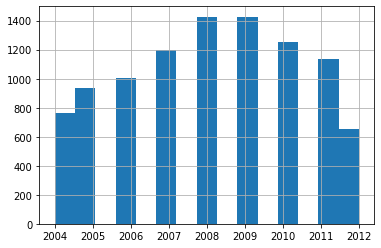

In [23]:
#посмотрим детальнее 2004-2012 года
data['year_of_release'].hist(bins = 15, range=(2004, 2012))

Пик выпуска игр приходится на 2008 и 2009 года.
Далее анализируем изменений продаж по платформам.

In [24]:
#просмотрим наиболее прибыльные платформы
top_platform = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [25]:
#теперь выведем список топ-10 платформ от наиболее к наименее прибыльным
top_platform = top_platform.reset_index()
top_platform_list = top_platform['platform'].unique()
top_10_platform = top_platform_list[:10]
top_10_platform

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

Самые прибыльные платформы за весь период: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP и PC

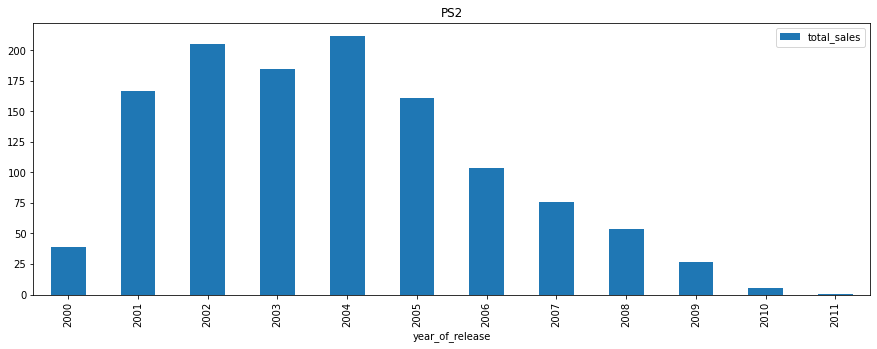

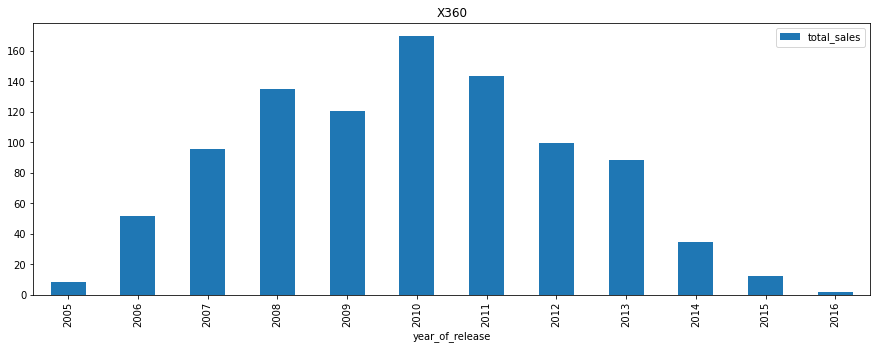

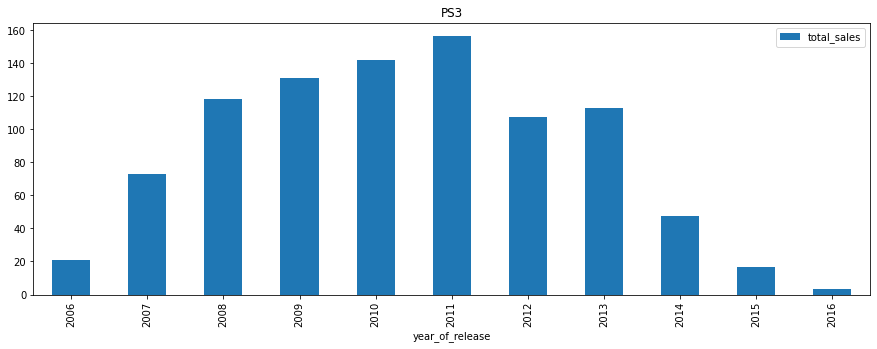

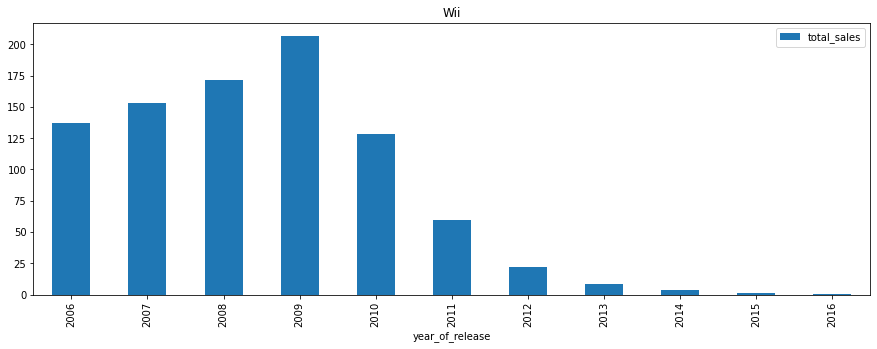

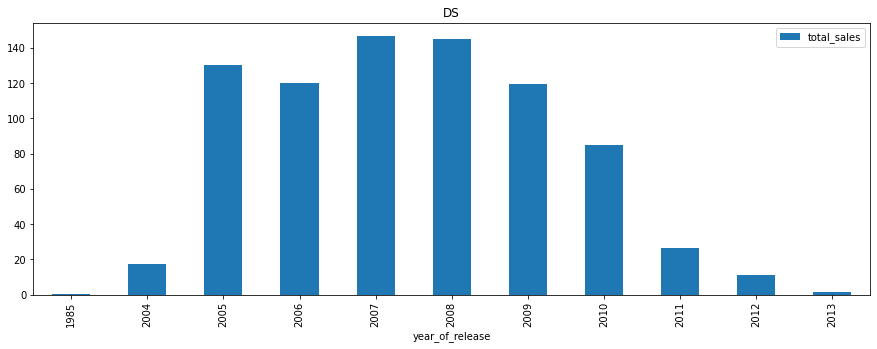

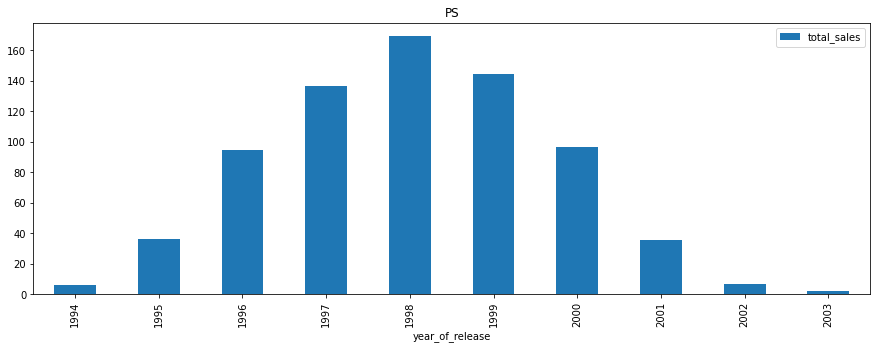

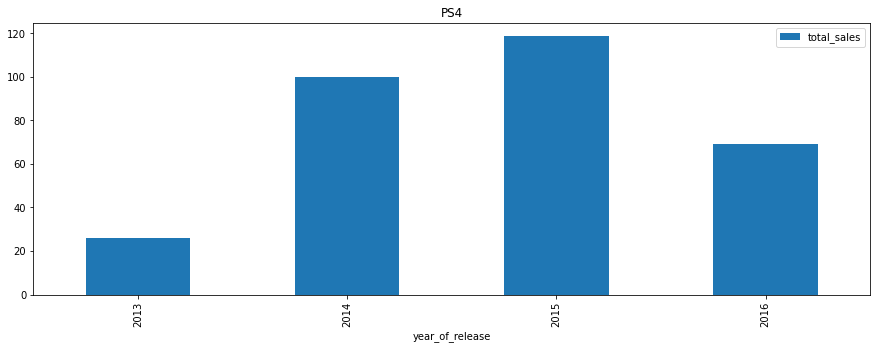

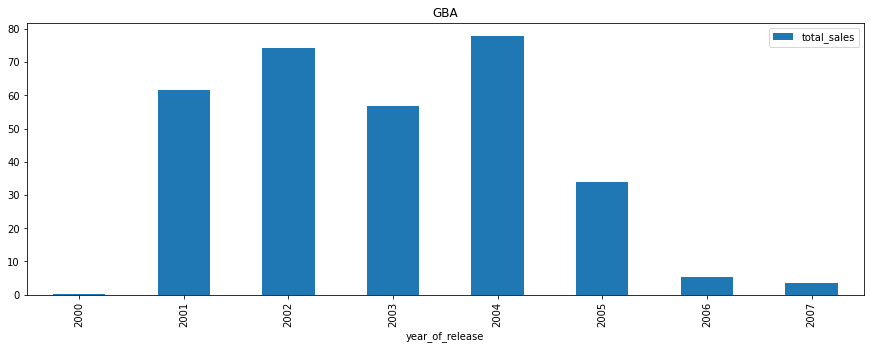

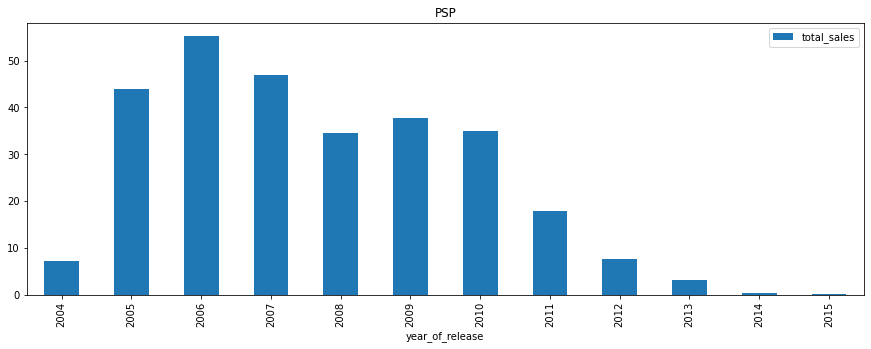

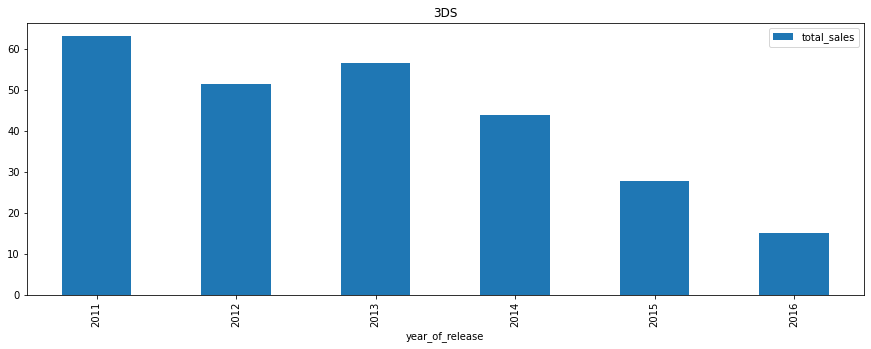

In [26]:
#Построим графики распределения по годам для каждой платформы
for platform in top_10_platform:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,5))
    plt.title(platform)

В среднем платформа существует по 10 лет:
- PS2:2000-2011 гг
- X360: 2005-2016 гг
- PS3: 2006-2016 гг
- Wii: 2006-2016 гг
- DS: 1985-2013 гг
- PS: 1994-2003 гг
- GBA: 2000-2007 гг
- PS4: 2013-2016 гг
- PSP: 2004-2015 гг
- PC: 1985-2016 гг

Рассмотрим данные за 2011-2016 года - эти данные помогут построить прогноз на 2017 год.
Больше брать не будем, так как чем дальше мы отклоняемся, тем сильнее прогноз может быть искажен.

In [27]:
#посмотрим детальнее 2011-2016 года
data_actual = data.query('2011 <= year_of_release <= 2016')
data_actual.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Лидирующими платформами по продажам в период 2011-2016 года стали PS3, X360, Wii, PS4, 3DS, XOne, PC, Wii

<AxesSubplot:xlabel='year_of_release'>

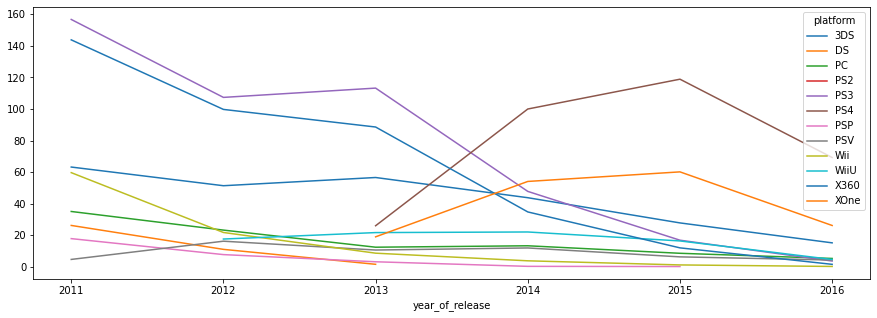

In [28]:
#посмотри как менялись продажи на платформах в течении времени
data_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 5))

Замечаем, что многие платформы к 2016 года начинают терять интерес пользователей, однако самая молодая из них и остающаяся на плаву платформа PS4 показывает хорошие результаты - запоминаем ее, 3DS и X0ne.

А вот DC, PSP, Wii вовсе теряют свои позиции - их выбирать не стоит вовсе. 

<AxesSubplot:>

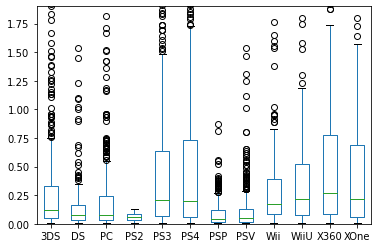

In [29]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
data_actual.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind = 'box', ylim = (0,1.9))

Больше всех прибыли у X360, затем X0ne и WiiU, PS4 и PS3. Поэтому пополняем список приоритетных платформ - WiiU и X360.

Далее будем смотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков на примере PS4 как наиболее потенциально прибыльную платформу.

0.40656790206178095


-0.031957110204556376

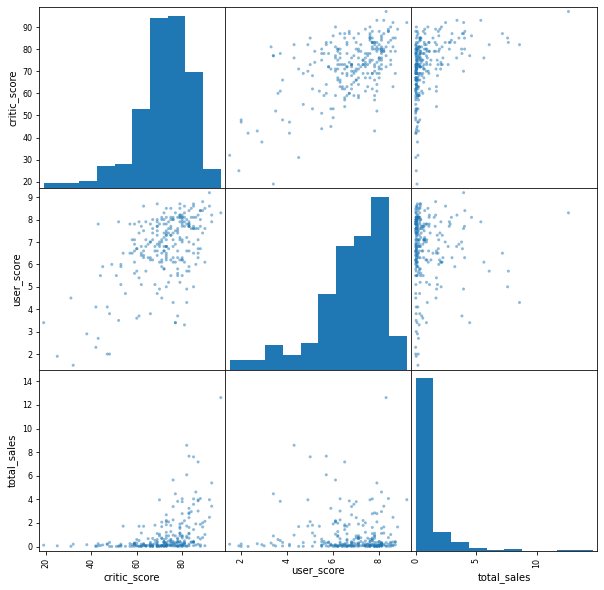

In [30]:
#выводим только те записи датафрейма, где значение столбца platform = PS4
data_PS4 = data.query('platform == "PS4"')
#оставляем только необходимые для анализа столбцы
data_PS4_need_colums = data_PS4[['critic_score', 'user_score', 'total_sales']]
#строим диаграмму рассеяния
pd.plotting.scatter_matrix(data_PS4_need_colums, figsize = (10,10))
#рассчитываем коэффициент корреляции между отзывами и продажами
print(data_PS4['critic_score'].corr(data_PS4['total_sales']))
data_PS4['user_score'].corr(data_PS4['total_sales'])

По проведенному анализу можно заметить, что между отзывами критиков и продажами слабая прямая связь. А между отзывами пользователей и продажами очень слабая обратная связь.

Можно сделать вывод, что покупатели больше прислушиваются к критикам и их оценкам, нежели к другим пользователям. Однако для точного ответа проведем подобный анализ для оставшихся приоритетных платформ 3DS, X0ne, WiiU и X360.

0.3487397305984834


0.22207843643390882

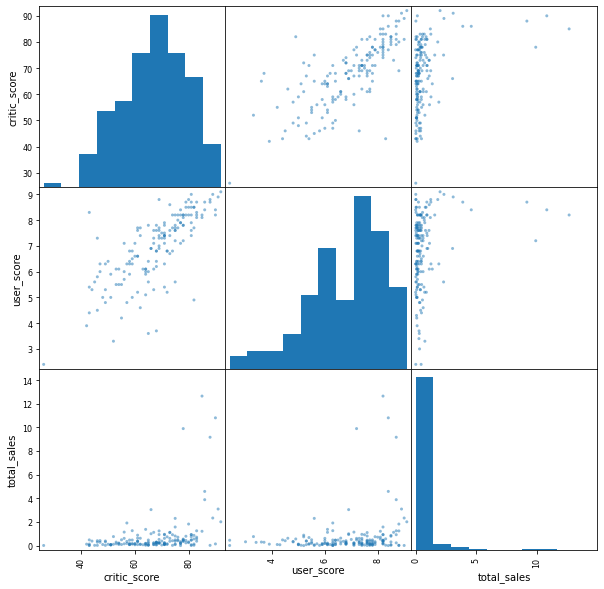

In [31]:
#выводим только те записи датафрейма, где значение столбца platform = 3DS
data_3DS = data.query('platform == "3DS"')
#оставляем только необходимые для анализа столбцы
data_3DS_need_colums = data_3DS[['critic_score', 'user_score', 'total_sales']]
#строим диаграмму рассеяния
pd.plotting.scatter_matrix(data_3DS_need_colums, figsize = (10,10))
#рассчитываем коэффициент корреляции между отзывами и продажами
print(data_3DS['critic_score'].corr(data_3DS['total_sales']))
data_3DS['user_score'].corr(data_3DS['total_sales'])

0.4169983280084017


-0.06892505328279414

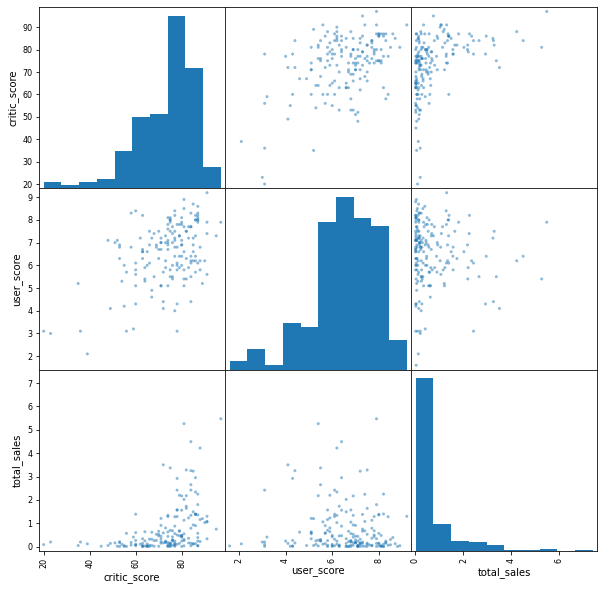

In [32]:
#выводим только те записи датафрейма, где значение столбца platform = XOne
data_XOne = data.query('platform == "XOne"')
#оставляем только необходимые для анализа столбцы
data_XOne_need_colums = data_XOne[['critic_score', 'user_score', 'total_sales']]
#строим диаграмму рассеяния
pd.plotting.scatter_matrix(data_XOne_need_colums, figsize = (10,10))
#рассчитываем коэффициент корреляции между отзывами и продажами
print(data_XOne['critic_score'].corr(data_XOne['total_sales']))
data_XOne['user_score'].corr(data_XOne['total_sales'])

0.34837976012017485


0.4002190202148617

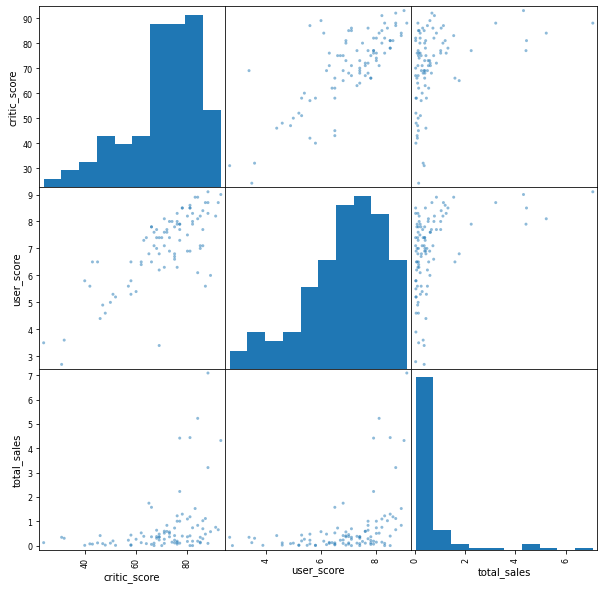

In [33]:
#выводим только те записи датафрейма, где значение столбца platform = WiiU
data_WiiU = data.query('platform == "WiiU"')
#оставляем только необходимые для анализа столбцы
data_WiiU_need_colums = data_WiiU[['critic_score', 'user_score', 'total_sales']]
#строим диаграмму рассеяния
pd.plotting.scatter_matrix(data_WiiU_need_colums, figsize = (10,10))
#рассчитываем коэффициент корреляции между отзывами и продажами
print(data_WiiU['critic_score'].corr(data_WiiU['total_sales']))
data_WiiU['user_score'].corr(data_WiiU['total_sales'])

0.39286589254006954


0.11418661214018049

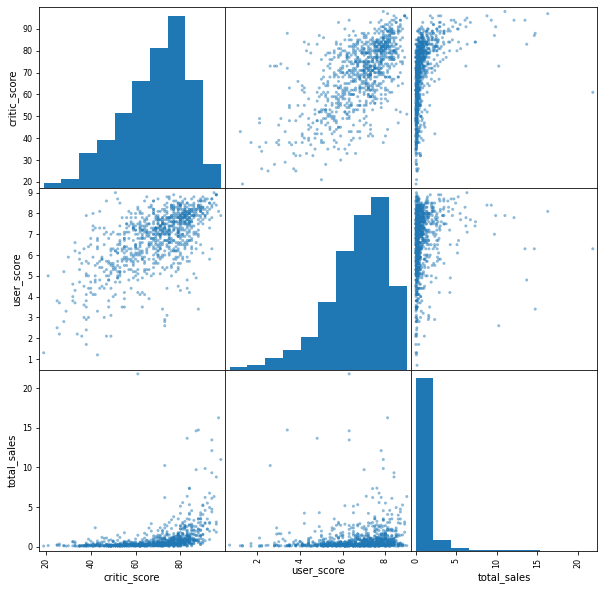

In [34]:
#выводим только те записи датафрейма, где значение столбца platform = X360
data_X360 = data.query('platform == "X360"')
#оставляем только необходимые для анализа столбцы
data_X360_need_colums = data_X360[['critic_score', 'user_score', 'total_sales']]
#строим диаграмму рассеяния
pd.plotting.scatter_matrix(data_X360_need_colums, figsize = (10,10))
#рассчитываем коэффициент корреляции между отзывами и продажами
print(data_X360['critic_score'].corr(data_X360['total_sales']))
data_X360['user_score'].corr(data_X360['total_sales'])

В итоге имеем следующие коэффициенты корреляции:
- PS4: 0.406 (м/у продажами и отзывами пользователей) и -0.032 (м/у продажами и отзывами критиков)
- 3DS: 0.35 (м/у продажами и отзывами пользователей) и 0.222 (м/у продажами и отзывами критиков)
- X0ne: 0.417 (м/у продажами и отзывами пользователей) и -0.069 (м/у продажами и отзывами критиков)
- WiiU: 0.35 (м/у продажами и отзывами пользователей) и 0.4 (м/у продажами и отзывами критиков)
- X360: 0.39 (м/у продажами и отзывами пользователей) и 0.114 (м/у продажами и отзывами критиков)
    
**Теперь однозначно можно сделать вывод**, что покупатели больше прислушиваются к критикам и их оценкам, нежели к другим пользователям.

Далее переходим к анализу жанров: найдем наиболее и наименее приыбльные жанры.

In [35]:
#просмотрим наиболее прибыльные жанры
top_genre = data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales', ascending = False)
top_genre

,total_sales
genre,
Shooter,0.410
Sports,0.200
Platform,0.185
Fighting,0.180
Racing,0.160
Role-Playing,0.150
Action,0.130
Misc,0.130
Simulation,0.110


Наиболее прибыльные жанры - это Shooter, Sports и Platform

Наименее - Adventure, Puzzle и Strategy

### Составим портрет пользователя каждого региона

Портрет начнем составлять с определения самых популярных платформ в каждом регионе.

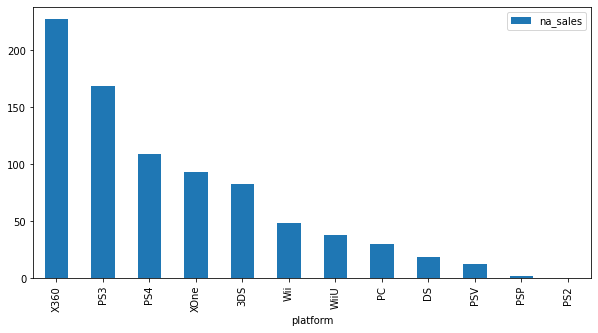

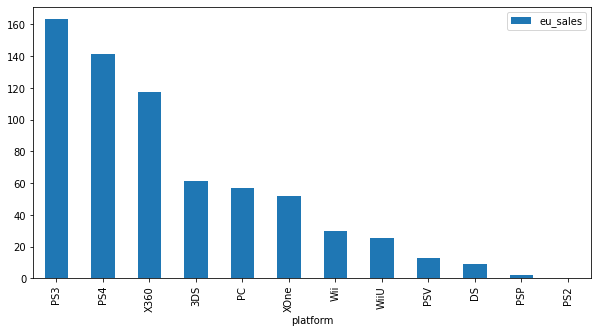

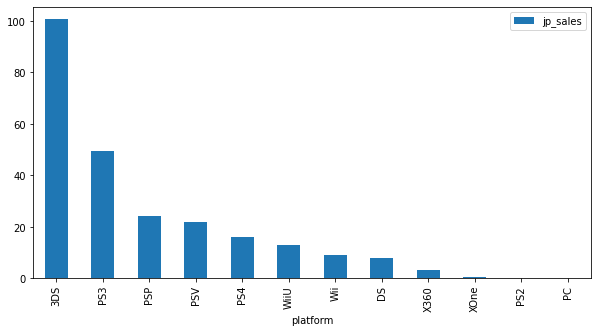

In [36]:
#определим для пользователей Северной Америки самые популярные платформы (топ-5)
top_na_platform = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
#для Европы
top_eu_platform = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
#для Японии
top_na_platform = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Как итог имеем следущие показатели:
- Для Северной Америки топ-5 платформ: X360, PS3, PS4, XOne и 3DS
- Для Европы: PS3, PS4, X360, 3DS и PC
- Для Японии: 3DS, PS3, PSP, PSV и PS4

Далее переходим к определению самых популярных жанров.

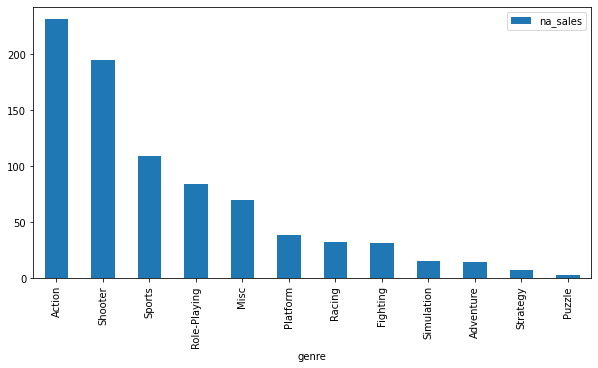

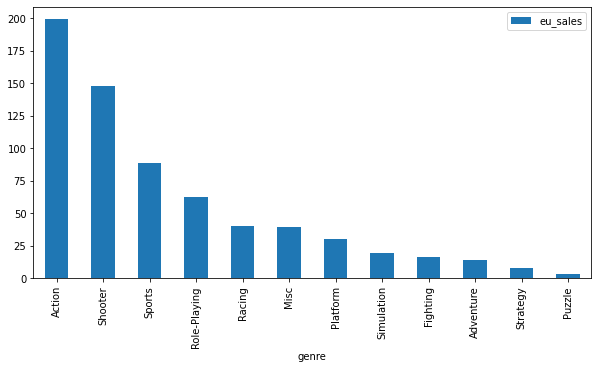

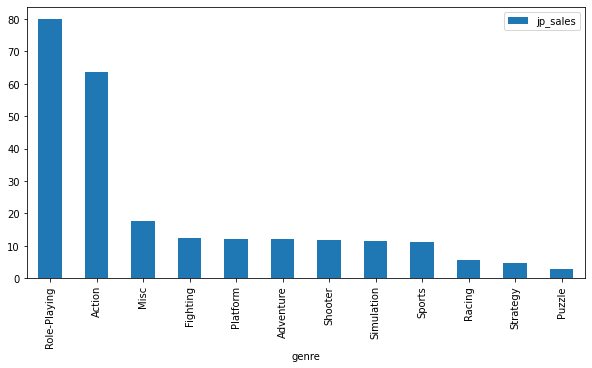

In [37]:
#определим для пользователей Северной Америки самые популярные жанры (топ-5)
top_na_genre = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
#для Европы
top_eu_genre = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
#для Японии
top_na_genre = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Как итог имеем следущие показатели:
- Для Северной Америки топ-5 жанров: Action, Shooter, Sports, Role-Playing и Misc
- Для Европы: Action, Shooter, Sports, Role-Playing и Racing
- Для Японии: Role-Playing, Action, Misc, Fighting и Platform

Можно заметить, что в Северной Америке и Европе пользователи имеют сильно схожий вкус в жанрах. 

Далее переходим к влиянию рейтинга ESRB на продажи в регионах.

In [38]:
#выведем уникальные значения столбца rating
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Рейтинг ESRB:
- E - «Для всех»
- M - «От 17 лет»
- T - «Подросткам 13—19 лет»
- E10+ - «Для всех старше 10 лет»
- K-A - «От 6 лет и старше»
- AO - «Только для взрослых»
- EC - «Для детей младшего возраста»
- RP - «Рейтинг ожидается»

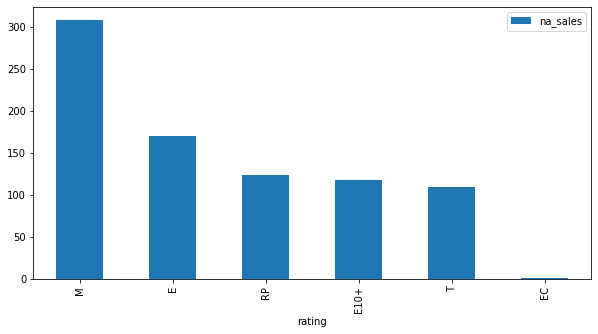

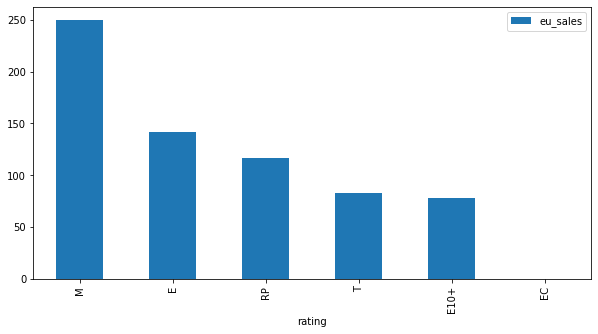

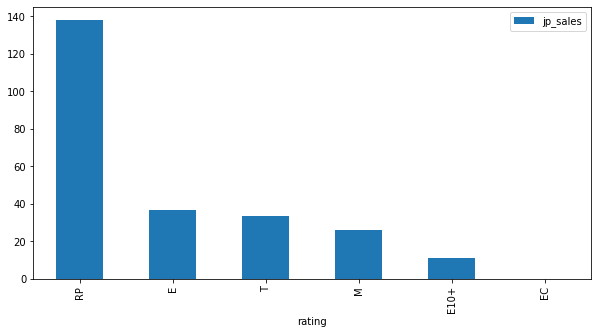

In [39]:
#определим влияние рейтинга ESRB на продажи в Северной Америке
top_na_ESRB = data_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
#для Европы
top_eu_ESRB = data_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))
#для Японии
top_na_ESRB = data_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Исходя из полученных данных можно сделать вывод, что рейтинг ESRB влияет на продажи в регионах. Так рейтинг игр EC («Для детей младшего возраста») не популярны вовсе в Европе и Японии.

**Вывод:**


Портрет пользователя Северной Америки: 
- топ платформ - X360, PS3, PS4, XOne и 3DS
- топ жанров - Action, Shooter, Sports, Role-Playing и Misc
- топ-рейтинг - M - «От 17 лет»

Портрет пользователя Европы: 
- топ платформ - PS3, PS4, X360, 3DS и PC
- топ жанров - Action, Shooter, Sports, Role-Playing и Racing
- топ-рейтинг - M - «От 17 лет»

Портрет пользователя Европы: 
- топ платформ - 3DS, PS3, PSP, PSV и PS4
- топ жанров - Role-Playing, Action, Misc, Fighting и Platform
- топ-рейтинг - RP - «Рейтинг ожидается»

### Проверяем гипотезы

**Гипотеза 1:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (гипотеза о равенстве средних двух генеральных совокупностей)

H0 - средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC

H1 - средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC

Пороговое значение alpha возьмем 5% - 0.05

In [40]:
#у массивов с выборками удаляем дополнительно пустые значения, иначе results.pvalue не будет считаться
sample_1 = data_actual[data_actual['platform'] == "XOne"]['user_score'].dropna()
sample_2 = data_actual[data_actual['platform'] == "PC"]['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

p-значение 0.6267602271422398
H0 не отвергается


**Первая гипотеза не опровергнута**, средние пользовательские рейтинги платформ Xbox One и PC равны.

**Гипотеза 2:** Средние пользовательские рейтинги жанров Action и Sports разные (гипотеза о равенстве средних двух генеральных совокупностей)

H0 - средний пользовательский рейтинг жанров Action = средний пользовательский рейтинг жанров Sports

H1 - средний пользовательский рейтинг жанров Action ≠ средний пользовательский рейтинг жанров Sports

In [41]:
#у массивов с выборками удаляем дополнительно пустые значения, иначе results.pvalue не будет считаться
sample_3 = data_actual[data_actual['genre'] == "Action"]['user_score'].dropna()
sample_4 = data_actual[data_actual['genre'] == "Sports"]['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(sample_3, sample_4)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('H0 отвергается')
else:
    print('H0 не отвергается')

p-значение 5.1974550252152054e-24
H0 отвергается


**Вторая гипотеза опровергнута**, средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

- В ходе проведенной работы с данными были определены пропущенные значения, избавились от них, там где это возможно без каких-либо последствий, изменили типы данных для более удобной работы. 

- В датафрейм был добавлен новый столбец total_sales с суммарными продажами во всех регионах. 

- Узнали , что игры начали выпускаться с 1980 года и примерно с 1998 года начался сильный прирост. Пик выпуска игр пришелся на 2008 и 2009 года. 

- Самые прибыльные платформы за весь период: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP и PC. 

- В среднем платформа существует по 10 лет.

- Для прогноза на 2017 год были взяты данные за 2011-2016 года.

- Лидирующими платформами по продажам в период 2011-2016 года стали PS3, X360, Wii, PS4, 3DS, XOne, PC, Wii. Однако, многие платформы к 2016 году начали терять интерес пользователей, но самая молодая из них и остающаяся на плаву платформа PS4 показала хорошие результаты, как и 3DS с X0ne. А вот Wii, PSP, DS  вовсе потеряли свои позиции. 

- Больше всех прибыли у X360, затем X0ne и WiiU, PS4 и PS3. 

- Покупатели больше прислушиваются к критикам и их оценкам, нежели к другим пользователям. 

- Рейтинг ESRB влияет на продажи в регионах, так, например, рейтинг EC («Для детей младшего возраста») не популярны вовсе в Европе и Японии. 

- Составлены портреты пользователей регионов:

Портрет пользователя Северной Америки:

топ платформ - X360, PS3, PS4, XOne и 3DS
топ жанров - Action, Shooter, Sports, Role-Playing и Misc
топ-рейтинг - M - «От 17 лет»
Портрет пользователя Европы:

топ платформ - PS3, PS4, X360, 3DS и PC
топ жанров - Action, Shooter, Sports, Role-Playing и Racing
топ-рейтинг - M - «От 17 лет»
Портрет пользователя Европы:

топ платформ - 3DS, PS3, PSP, PSV и PS4
топ жанров - Role-Playing, Action, Misc, Fighting и Platform
топ-рейтинг - RP - «Рейтинг ожидается»

- В ходе проверок гипотез мы пришли к тому, что первая гипотеза не опровергнута, средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а вот вторая гипотеза опровергнута, средние пользовательские рейтинги жанров Action и Sports действительно разные.